In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_data = pd.read_csv('/content/advertising.csv')

In [3]:
sales_data.sample(5)

,TV,Radio,Newspaper,Sales
132,8.4,27.2,2.1,5.7
135,48.3,47.0,8.5,11.6
160,172.5,18.1,30.7,16.4
88,88.3,25.5,73.4,12.9
13,97.5,7.6,7.2,13.7


In [4]:
sales_data.shape

(200, 4)

In [5]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

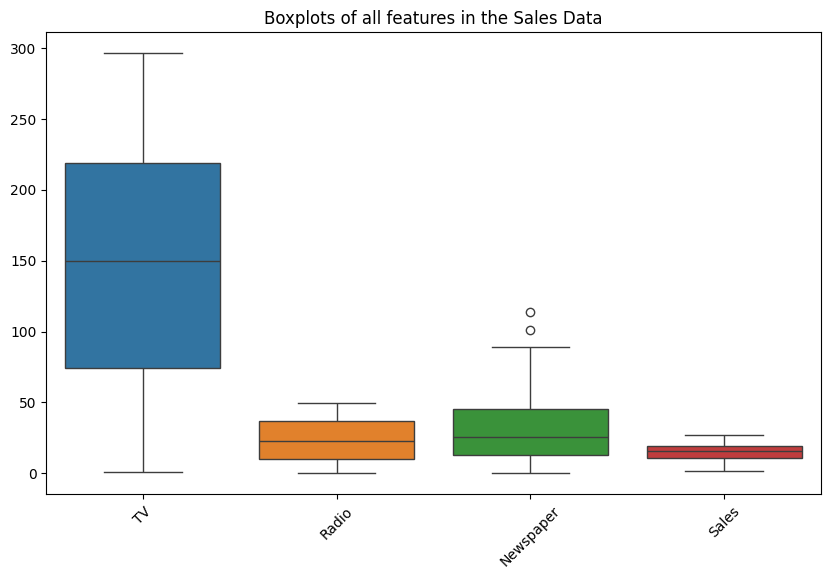

In [8]:
# draw a box plot for all features

import seaborn as sns
import matplotlib.pyplot as plt

# Get list of numeric columns
numeric_columns = sales_data.select_dtypes(include=[np.number]).columns.tolist()

# Create the boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_data[numeric_columns])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and show plot
plt.title("Boxplots of all features in the Sales Data")
plt.show()


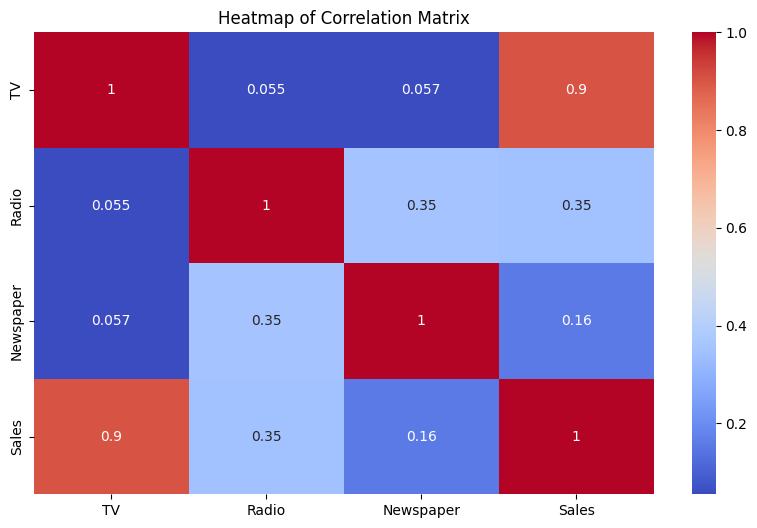

In [9]:
# now  check the correlation between columns  and also draw a heatmap

# Calculate the correlation matrix
correlation_matrix = sales_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Add title and show plot
plt.title("Heatmap of Correlation Matrix")
plt.show()


In [10]:
# now drop the other columns than TV AND sales

sales_data_subset = sales_data[['TV', 'Sales']]
sales_data_subset.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [11]:
# now train split data

from sklearn.model_selection import train_test_split

X = sales_data_subset['TV']
y = sales_data_subset['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (160,)
y_train shape: (160,)
X_test shape: (40,)
y_test shape: (40,)


R^2: 0.802561303423698
MSE: 6.101072906773963
RMSE: 2.470035001123256


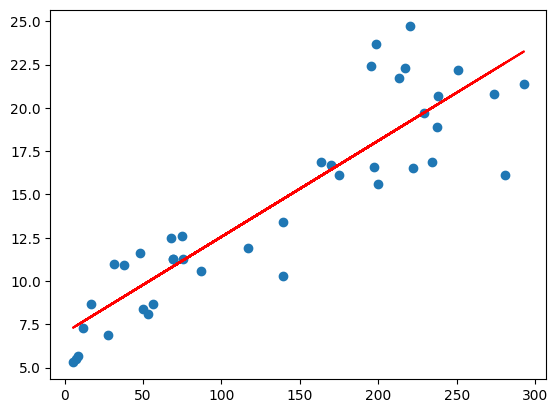

In [12]:
# now apply simple linear regression

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the test data
y_pred = model.predict(X_test.values.reshape(-1, 1))

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the coefficient of determination (R^2)
r_squared = model.score(X_test.values.reshape(-1, 1), y_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("R^2:", r_squared)
print("MSE:", mse)
print("RMSE:", rmse)

# Plot the data and the regression line
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()


In [13]:
# now make a pickel model

import pickle

# Save the trained model to a file
with open('sales_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [15]:
# now import pickel model and predict the  get input from user

# Load the pickled model
with open('sales_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Get input from user
tv_spend = float(input("Enter the TV advertising spend: "))

# Predict the sales
predicted_sales = model.predict([[tv_spend]])

# Print the predicted sales
print("Predicted sales:", predicted_sales[0])


Enter the TV advertising spend: 56.0
Predicted sales: 10.114153288403788
